# Multi-Layer Perceptron Classification with and without applying PCA

- Data Exploration
    - Numerical Features Distribution
    - Categorical Features Distribution
- Preprocessing
    - Label Encoding
    - Standardization 
    - Splitting
- Multi-Layer Perceptron Model
    - Evaluate Model
- Multi-Layer Perceptron Model (With PCA)
    - Covariance matrix
    - Computing Eigenvectors and Eigenvalues: 
    - Selecting Principal Components
    - Evaluate Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from pretty_confusion_matrix import pp_matrix, pp_matrix_from_data



sns.set(rc={'figure.figsize':(20,8)})
plt.style.use('fivethirtyeight')

In [2]:
# !pip install pretty-confusion-matrix

### Data: HR_comma_sep.csv

In [2]:
# Load data
data=pd.read_csv('train.csv')

data.head()

ID (this is not a feature)  age      workclass  fnlwgt      education  \
0                           1   36        Private  355053        HS-grad   
1                           2   30   Self-emp-inc  132601      Bachelors   
2                           3   19        Private   63814   Some-college   
3                           4   44        Private  112507   Some-college   
4                           5   51   Self-emp-inc  126850        HS-grad   

   education-num       marital-status         occupation    relationship  \
0              9            Separated      Other-service       Unmarried   
1             13   Married-civ-spouse       Craft-repair         Husband   
2             10        Never-married       Adm-clerical   Not-in-family   
3             10   Married-civ-spouse              Sales         Husband   
4              9   Married-civ-spouse   Transport-moving         Husband   

     race      sex  capital-gain  capital-loss  hours-per-week  \
0   Black   Female             0             0              28   
1   White     Male             0             0              40   
2   White   Female             0             0              18   
3   White     Male             0             0              40   
4   White     Male             0             0              65   

   native-country salary  
0   United-States  <=50K  
1   United-States   >50K  
2   United-States  <=50K  
3   United-States  <=50K  
4   United-States  <=50K

### Data Exploration

In [5]:
print(data.head())
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*data.shape))
names = data.columns.values
print ("_"*90)
print (names)
target = pd.DataFrame(data["salary"]) #  Interim DF only -Target Feature
names1 = target.columns.values
print ("_"*90)
print (names1)
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*target.shape))
print ("_"*90)
print (target["salary"].value_counts())

   ID (this is not a feature)  age      workclass  fnlwgt      education  \
0                           1   36        Private  355053        HS-grad   
1                           2   30   Self-emp-inc  132601      Bachelors   
2                           3   19        Private   63814   Some-college   
3                           4   44        Private  112507   Some-college   
4                           5   51   Self-emp-inc  126850        HS-grad   

   education-num       marital-status         occupation    relationship  \
0              9            Separated      Other-service       Unmarried   
1             13   Married-civ-spouse       Craft-repair         Husband   
2             10        Never-married       Adm-clerical   Not-in-family   
3             10   Married-civ-spouse              Sales         Husband   
4              9   Married-civ-spouse   Transport-moving         Husband   

     race      sex  capital-gain  capital-loss  hours-per-week  \
0   Black   Female  

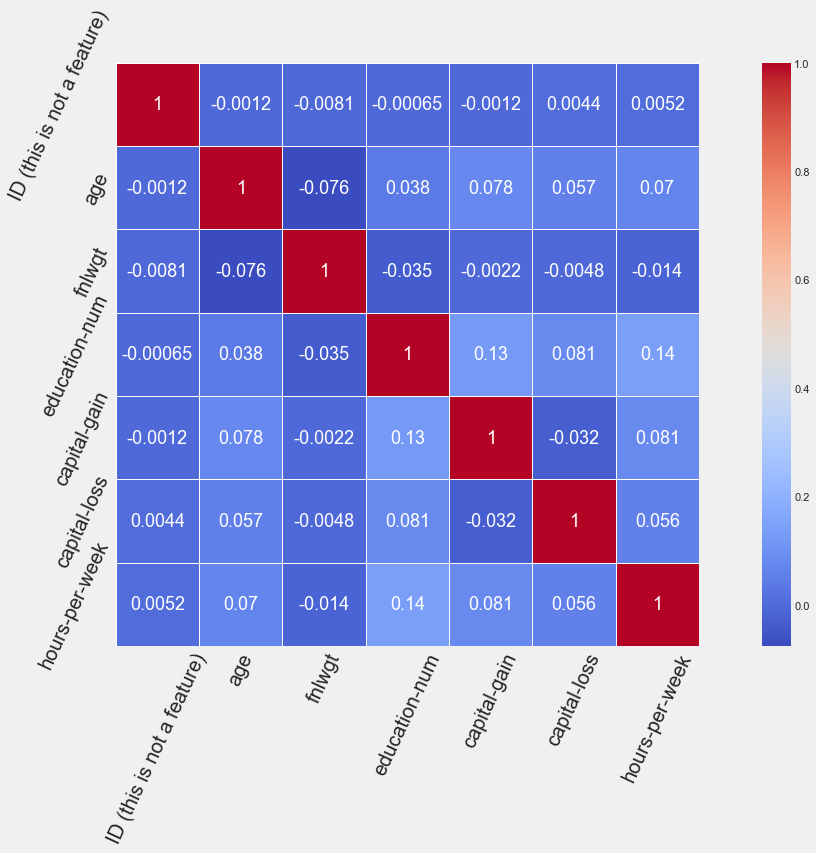

In [8]:
plt.figure(figsize=(20,10))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True, square=True, linewidths=1, annot_kws={"fontsize":18});
plt.yticks(fontsize=20, rotation=65);
plt.xticks(fontsize=20, rotation=65);

In [9]:
data.dtypes

ID (this is not a feature)     int64
age                            int64
workclass                     object
fnlwgt                         int64
education                     object
education-num                  int64
marital-status                object
occupation                    object
relationship                  object
race                          object
sex                           object
capital-gain                   int64
capital-loss                   int64
hours-per-week                 int64
native-country                object
salary                        object
dtype: object

In [10]:
data

ID (this is not a feature)  age          workclass  fnlwgt  \
0                               1   36            Private  355053   
1                               2   30       Self-emp-inc  132601   
2                               3   19            Private   63814   
3                               4   44            Private  112507   
4                               5   51       Self-emp-inc  126850   
...                           ...  ...                ...     ...   
38837                       38838   56   Self-emp-not-inc  157486   
38838                       38839   43                  ?  109912   
38839                       38840   28            Private  271012   
38840                       38841   75            Private  191446   
38841                       38842   50            Private  210217   

           education  education-num       marital-status         occupation  \
0            HS-grad              9            Separated      Other-service   
1          Bachelors             13   Married-civ-spouse       Craft-repair   
2       Some-college             10        Never-married       Adm-clerical   
3       Some-college             10   Married-civ-spouse              Sales   
4            HS-grad              9   Married-civ-spouse   Transport-moving   
...              ...            ...                  ...                ...   
38837           10th              6             Divorced              Sales   
38838      Bachelors             13   Married-civ-spouse                  ?   
38839        HS-grad              9        Never-married       Adm-clerical   
38840        1st-4th              2   Married-civ-spouse      Other-service   
38841      Bachelors             13             Divorced              Sales   

          relationship    race      sex  capital-gain  capital-loss  \
0            Unmarried   Black   Female             0             0   
1              Husband   White     Male             0             0   
2        Not-in-family   White   Female             0             0   
3              Husband   White     Male             0             0   
4              Husband   White     Male             0             0   
...                ...     ...      ...           ...           ...   
38837        Own-child   White     Male             0             0   
38838             Wife   White   Female             0             0   
38839    Not-in-family   Black   Female             0             0   
38840   Other-relative   Black   Female             0             0   
38841        Unmarried   Black     Male             0             0   

       hours-per-week  native-country salary  
0                  28   United-States  <=50K  
1                  40   United-States   >50K  
2                  18   United-States  <=50K  
3                  40   United-States  <=50K  
4                  65   United-States  <=50K  
...               ...             ...    ...  
38837              40   United-States  <=50K  
38838               7   United-States   >50K  
38839              40   United-States  <=50K  
38840              16   United-States  <=50K  
38841              40   United-States  <=50K  

[38842 rows x 16 columns]

In [11]:
numerical = [
  'age', 'fnlwgt',  'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 
]
categorical = [
  'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary'  
]

### Numerical Features Distribution

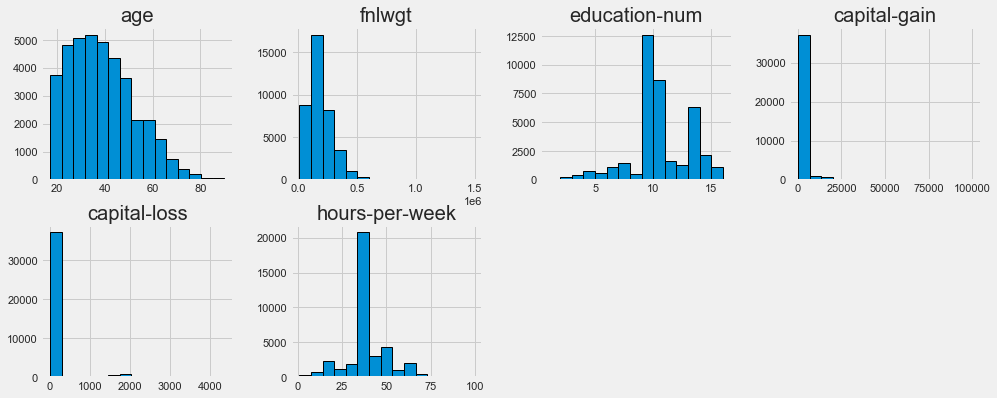

In [12]:

data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4), edgecolor='black', linewidth=1);

### Categorical Features Distribution

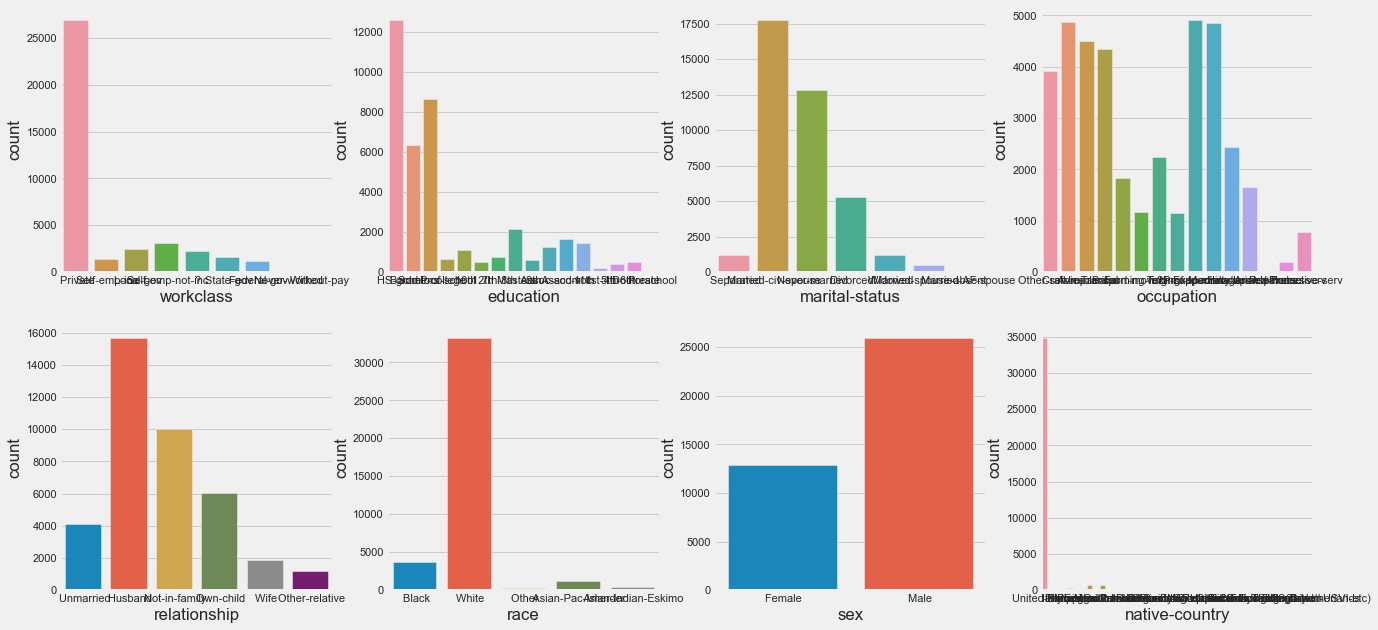

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=data[variable], ax=subplot)

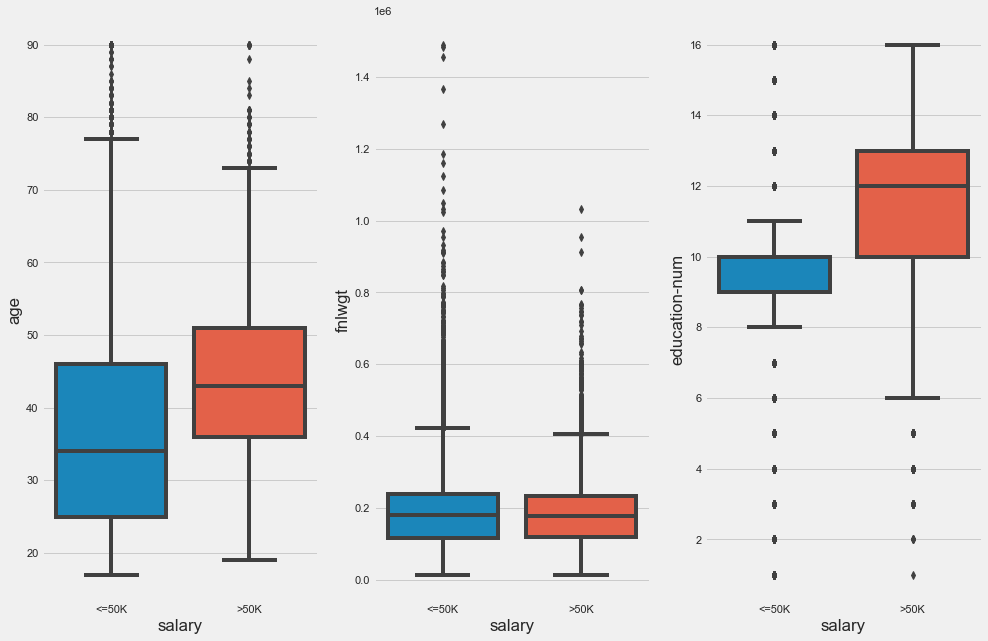

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(y=var, x='salary', data=data, ax=subplot)

### Preprocessing: Label Encoding

In [17]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['workclass']=le.fit_transform(data['workclass'])
data['education']=le.fit_transform(data['education'])
data['marital-status']=le.fit_transform(data['marital-status'])
data['occupation']=le.fit_transform(data['occupation'])
data['relationship']=le.fit_transform(data['relationship'])
data['race']=le.fit_transform(data['race'])
data['sex']=le.fit_transform(data['sex'])
data['native-country']=le.fit_transform(data['native-country'])

### Preprocessing: Standardization & Splitting 

In [19]:
X = data.drop('salary', axis=1)
y = data['salary']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

### Multi-Layer Perceptron Model

In [20]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    random_state=5,
                    verbose=True,
                    activation = 'relu',
                    solver = 'adam',
                    alpha=0.0001,
                    batch_size=min(200, len(data)),
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.41743787
Iteration 2, loss = 0.34424596
Iteration 3, loss = 0.33608282
Iteration 4, loss = 0.33229415
Iteration 5, loss = 0.32954471
Iteration 6, loss = 0.32943862
Iteration 7, loss = 0.32684693
Iteration 8, loss = 0.32624749
Iteration 9, loss = 0.32549024
Iteration 10, loss = 0.32477357
Iteration 11, loss = 0.32517706
Iteration 12, loss = 0.32429627
Iteration 13, loss = 0.32473583
Iteration 14, loss = 0.32343202
Iteration 15, loss = 0.32350361
Iteration 16, loss = 0.32302663
Iteration 17, loss = 0.32337497
Iteration 18, loss = 0.32323102
Iteration 19, loss = 0.32270547
Iteration 20, loss = 0.32341877
Iteration 21, loss = 0.32310097
Iteration 22, loss = 0.32182017
Iteration 23, loss = 0.32245216
Iteration 24, loss = 0.32214891
Iteration 25, loss = 0.32234887
Iteration 26, loss = 0.32266749
Iteration 27, loss = 0.32197378
Iteration 28, loss = 0.32195102
Iteration 29, loss = 0.32248659
Iteration 30, loss = 0.32168849
Iteration 31, loss = 0.32188200
Iteration 32, los

MLPClassifier(batch_size=200, hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, verbose=True)

### Evaluate Model

In [21]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.8493950055779628

In [22]:
print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

              precision    recall  f1-score   support

     class A       0.87      0.94      0.90      8853
     class B       0.74      0.57      0.65      2800

    accuracy                           0.85     11653
   macro avg       0.81      0.75      0.77     11653
weighted avg       0.84      0.85      0.84     11653



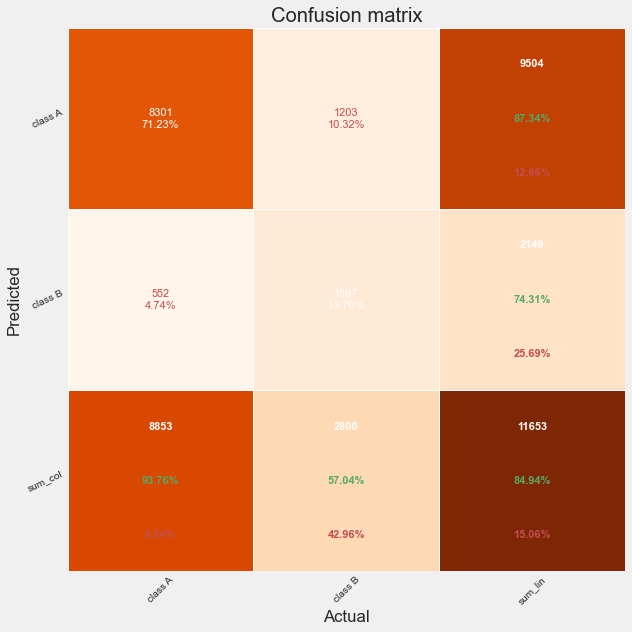

In [23]:
pp_matrix_from_data(y_test,ypred)

## Using "test.csv" to test MLP model (without retraining)

0.8633333333333333
              precision    recall  f1-score   support

     class A       0.89      0.95      0.91      2316
     class B       0.76      0.58      0.66       684

    accuracy                           0.86      3000
   macro avg       0.82      0.77      0.79      3000
weighted avg       0.86      0.86      0.86      3000



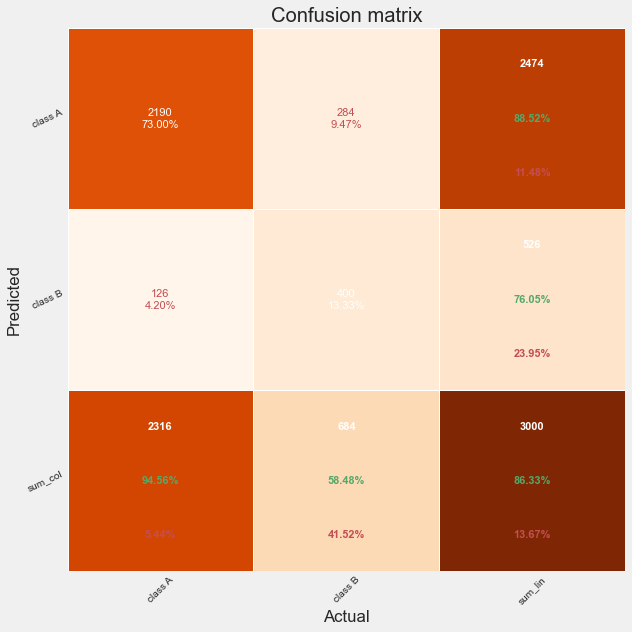

In [26]:
# Load data
data_test=pd.read_csv('test.csv')

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data_test['salary']=le.fit_transform(data_test['salary'])
data_test['workclass']=le.fit_transform(data_test['workclass'])
data_test['education']=le.fit_transform(data_test['education'])
data_test['marital-status']=le.fit_transform(data_test['marital-status'])
data_test['occupation']=le.fit_transform(data_test['occupation'])
data_test['relationship']=le.fit_transform(data_test['relationship'])
data_test['race']=le.fit_transform(data_test['race'])
data_test['sex']=le.fit_transform(data_test['sex'])
data_test['native-country']=le.fit_transform(data_test['native-country'])

X = data_test.drop('salary', axis=1)
y = data_test['salary']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
print(accuracy_score(y_test,ypred))

print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

pp_matrix_from_data(y_test,ypred)

### Classification Model (With PCA)

In [27]:
# Going back to "train.csv" to set up MLP with PCA
X = data.drop('salary', axis=1)
y = data['salary']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

#### Computing Eigenvectors and Eigenvalues: Covariance matrix

In [28]:
print('Covariance matrix: \n%s' % np.cov(X_scaled.T))

cov_matrix = np.cov(X_scaled.T)

Covariance matrix: 
[[ 1.00002575e+00 -1.24923694e-03  1.96721594e-03 -8.05773000e-03
  -1.06747176e-03 -6.51235535e-04 -4.91938628e-03  1.00792553e-02
  -3.10790460e-03  4.68164371e-03  4.61027491e-03 -1.15095525e-03
   4.35354747e-03  5.22978730e-03  1.44730595e-03]
 [-1.24923694e-03  1.00002575e+00  1.54228686e-02 -7.61812746e-02
  -1.05927908e-02  3.75500917e-02 -2.61605462e-01 -1.42223803e-02
  -2.65272982e-01  3.08124660e-02  8.59006168e-02  7.78512037e-02
   5.74595592e-02  7.04498427e-02 -4.91161659e-03]
 [ 1.96721594e-03  1.54228686e-02  1.00002575e+00 -1.70174174e-02
   1.75475408e-02  5.94461825e-02 -7.20250206e-02  2.59235816e-01
  -9.09854119e-02  5.09858039e-02  8.96813816e-02  3.79655029e-02
   1.36016076e-02  1.38377934e-01 -7.75132175e-03]
 [-8.05773000e-03 -7.61812746e-02 -1.70174174e-02  1.00002575e+00
  -1.81526765e-02 -3.46646970e-02  3.28941204e-02 -3.74824351e-03
   9.86428424e-03 -2.32582011e-02  2.84239903e-02 -2.17512703e-03
  -4.81373683e-03 -1.36150553e-02 -

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[-9.18533531e-03  8.69938520e-04  2.77502370e-04  7.84305295e-03
   1.83199114e-02 -9.98360960e-03  2.42188261e-02  5.60027469e-02
   5.30548270e-02  1.55436044e-01 -9.81003092e-01  7.06111569e-02
  -3.13334779e-02 -1.26232501e-02 -1.50272208e-02]
 [-2.86436459e-01 -2.28558994e-01  1.28293763e-01 -9.95758946e-02
  -3.59957737e-01 -5.27724258e-01  1.02997683e-01 -1.83472623e-01
   4.35608391e-01  3.83854339e-02  4.33790650e-02  1.57069996e-01
  -5.90923869e-02 -2.31440339e-01 -3.34917485e-01]
 [-2.16097556e-01  2.13899236e-03 -1.04493616e-01  1.69701839e-01
   5.38435682e-01  9.37172034e-03  6.98471159e-01  1.72326887e-01
   2.79574173e-01  8.44509758e-03  6.53201987e-02  8.27496241e-02
  -1.08042168e-01  7.06848525e-02  1.89387794e-03]
 [ 4.46337840e-02  8.23139594e-03  9.82832109e-02  1.50865009e-02
   1.77844057e-01 -1.20580164e-01  2.68090135e-02 -1.87455729e-01
  -5.09019396e-01 -1.05863223e-01  1.42102672e-02  7.19820049e-01
  -2.89159421e-01 -1.71442135e-01 -6.6107

#### Selecting Principal Components

In [30]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.122868601892958
1.4110762600592464
1.246489689961959
1.1169734335511625
1.0905486891545164
1.029909320594739
0.9990517393789698
0.9505884475669344
0.9256180119401306
0.8581109396549921
0.8447478574166782
0.7436562007685533
0.6863338826776775
0.5890482264970717
0.38536488873533836


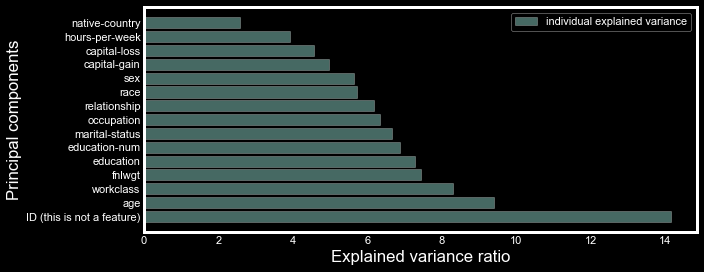

In [31]:
# how many principal components are we going to choose for our new feature subspace?
# ANSWER: explained variance tells us how much information (variance) can be attributed to each of the principal components

cols = data.columns.tolist()
cols.insert(0, cols.pop(cols.index('salary')))

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

x_pos = [i for i, _ in enumerate(cols[1:])]

with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 4))

    plt.barh(x_pos, var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.xlabel('Explained variance ratio')
    plt.ylabel('Principal components')
    plt.yticks(x_pos, cols[1:])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(False)

Text(0, 0.5, 'Cumulative explained variance')

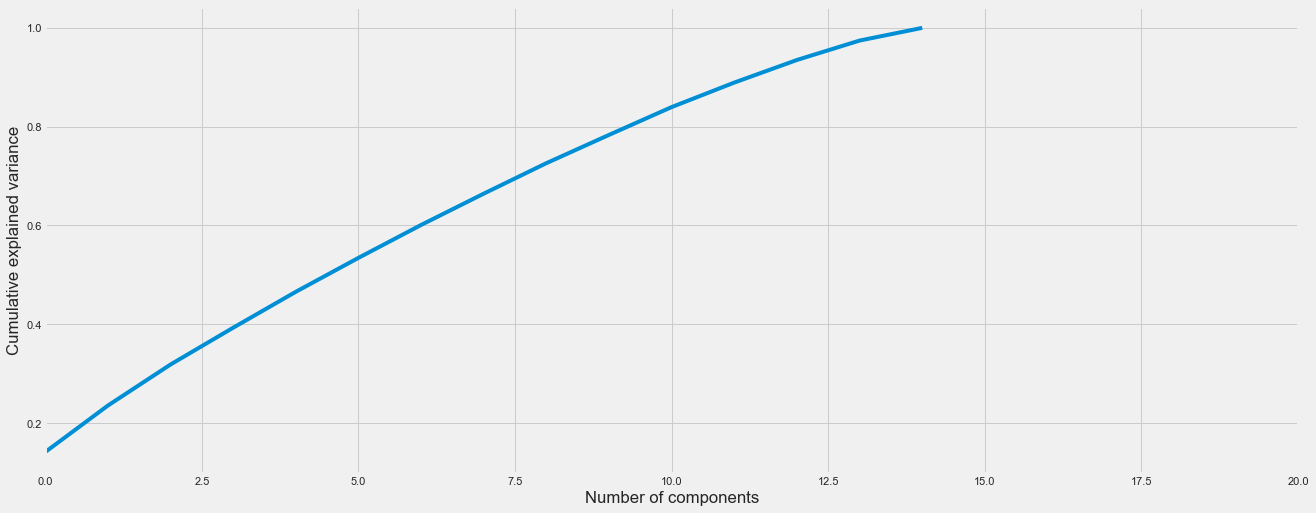

In [32]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [58]:
pca = PCA(n_components=6)

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

X = data.drop('salary', axis=1)
y = data['salary']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

clf.fit(X_train, y_train)



Iteration 1, loss = 0.46629443
Iteration 2, loss = 0.39460747
Iteration 3, loss = 0.38571893
Iteration 4, loss = 0.38234387
Iteration 5, loss = 0.37991396
Iteration 6, loss = 0.37503961
Iteration 7, loss = 0.37441412
Iteration 8, loss = 0.37290499
Iteration 9, loss = 0.37222028
Iteration 10, loss = 0.37227556
Iteration 11, loss = 0.37167276
Iteration 12, loss = 0.37136391
Iteration 13, loss = 0.37111532
Iteration 14, loss = 0.37123092
Iteration 15, loss = 0.37031601
Iteration 16, loss = 0.37037445
Iteration 17, loss = 0.37005954
Iteration 18, loss = 0.37009530
Iteration 19, loss = 0.36969528
Iteration 20, loss = 0.37035140
Iteration 21, loss = 0.36987072
Iteration 22, loss = 0.36850840
Iteration 23, loss = 0.36979155
Iteration 24, loss = 0.36894247
Iteration 25, loss = 0.36881529
Iteration 26, loss = 0.36839966
Iteration 27, loss = 0.36772293
Iteration 28, loss = 0.36769381
Iteration 29, loss = 0.36774437
Iteration 30, loss = 0.36757264
Iteration 31, loss = 0.36655869
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [59]:
pca.explained_variance_ratio_

array([0.14201434, 0.09404924, 0.08315076, 0.07511317, 0.07288978,
       0.06872423])

In [60]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)



0.8269973397408392

In [61]:

print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

              precision    recall  f1-score   support

     class A       0.86      0.93      0.89      8853
     class B       0.69      0.51      0.58      2800

    accuracy                           0.83     11653
   macro avg       0.77      0.72      0.74     11653
weighted avg       0.82      0.83      0.82     11653



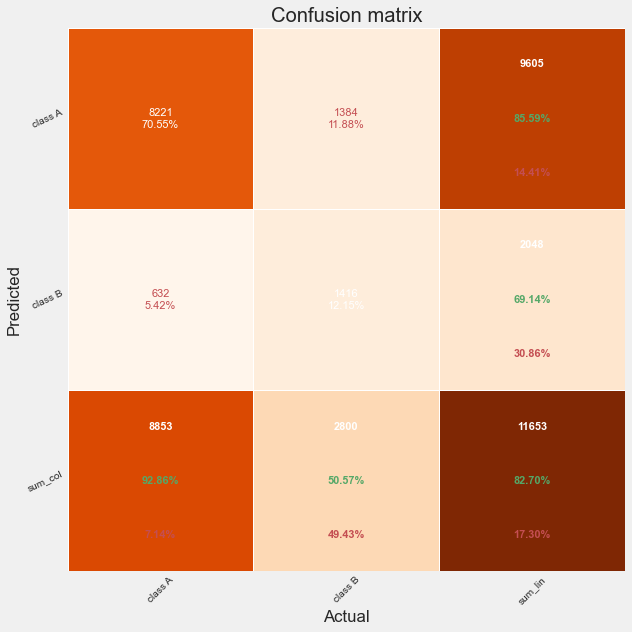

In [62]:
pp_matrix_from_data(y_test,ypred)

## Using "test.csv" to test MLP model with PCA (without retraining)

0.7506666666666667
              precision    recall  f1-score   support

     class A       0.81      0.89      0.85      2316
     class B       0.43      0.29      0.35       684

    accuracy                           0.75      3000
   macro avg       0.62      0.59      0.60      3000
weighted avg       0.72      0.75      0.73      3000



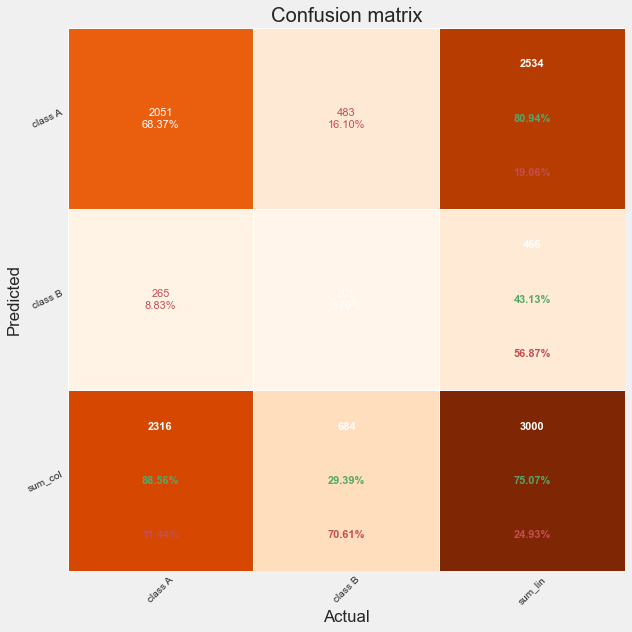

In [63]:
X = data_test.drop('salary', axis=1)
y = data_test['salary']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
print(accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred, target_names=['class A', 'class B']))
pp_matrix_from_data(y_test,ypred)